In [35]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy as sp

In [3]:
#import the sales_data
df=pd.read_csv("https://raw.githubusercontent.com/Fangda2023/schulich_data_science/main/sales_data.csv")


In [33]:
df

,Product,Region,Price,Units Sold,Sale Date
0,NaN,Region_1,72.87,10.0,2022-01-01
1,Product_40,Region_2,46.19,10.0,2022-01-02
2,Product_1,Region_5,NaN,4.0,2022-01-03
3,Product_6,Region_8,143.47,8.0,2022-01-04
4,Product_44,Region_4,122.54,10.0,2022-01-05
...,...,...,...,...,...
1045,Product_42,Region_3,18.63,9.0,2023-07-10
1046,Product_4,Region_3,159.27,10.0,2024-07-14
1047,Product_43,Region_1,2.91,13.0,2023-08-17
1048,Product_27,Region_7,1.96,8.0,2024-03-10


In [30]:
#summarize the data structure
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1050 entries, 0 to 1049
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Product     947 non-null    object 
 1   Region      942 non-null    object 
 2   Price       945 non-null    float64
 3   Units Sold  943 non-null    float64
 4   Sale Date   1050 non-null   object 
dtypes: float64(2), object(3)
memory usage: 41.1+ KB


In [15]:
#summarize the descriptive statistics
df.describe(include="all")


,Product,Region,Price,Units Sold,Sale Date
count,947,942,945.000000,943.000000,1050
unique,50,10,NaN,NaN,1000
top,Product_4,Region_5,NaN,NaN,2023-07-31
freq,30,112,NaN,NaN,2
mean,NaN,NaN,108.628011,10.200424,NaN
std,NaN,NaN,167.350086,3.247589,NaN
min,NaN,NaN,0.190000,2.000000,NaN
25%,NaN,NaN,26.420000,8.000000,NaN
50%,NaN,NaN,64.640000,10.000000,NaN
75%,NaN,NaN,142.310000,12.000000,NaN


The histogram for price skewed heavily to the right.
The histogram for Units Sold skewed only slightly to the right.

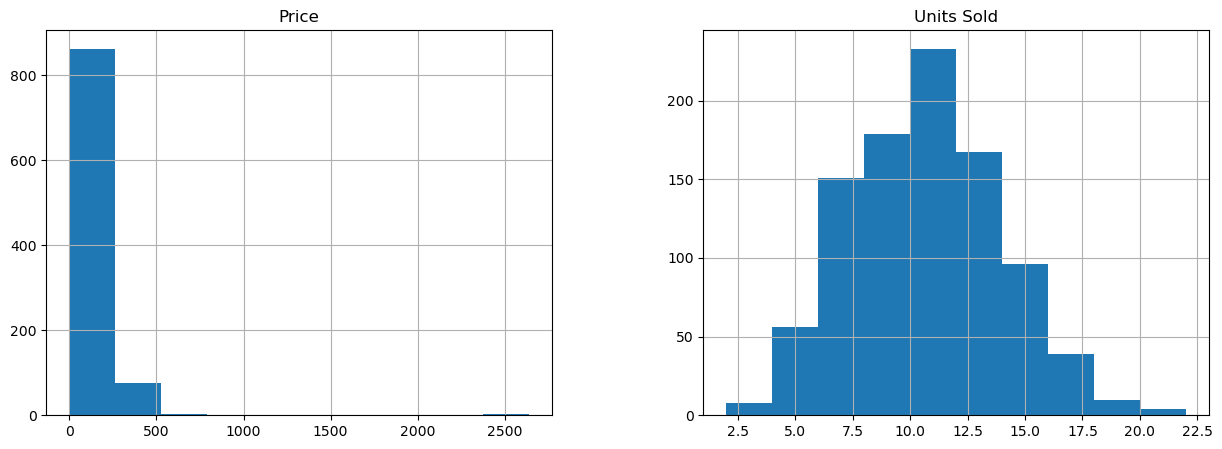

In [22]:
#raw data visualization
#histograms for price and units sold
df.hist(figsize=(15,5))
plt.show()

<Axes: xlabel='Price'>

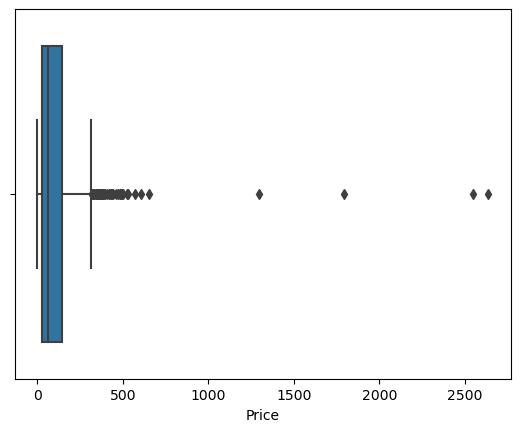

In [43]:
#boxplot for Price
sns.boxplot(x="Price",data=df)

<Axes: xlabel='Units Sold'>

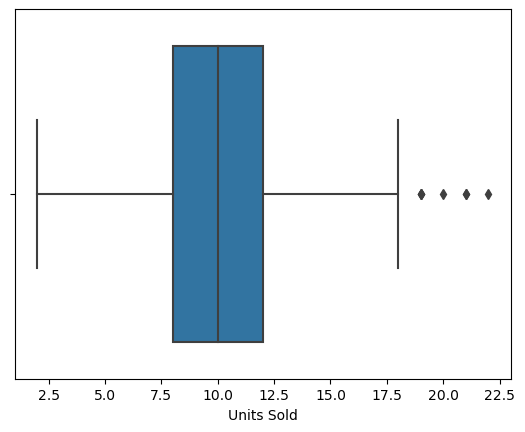

In [44]:
#boxplot of units sold
sns.boxplot(x='Units Sold', data=df)

##data cleaning

the .info() function tells us that there are missing values for each variables. For "Units Sold" which has 4 outliers all on the right side of the whisker, median imputation is used to fill the missing values because 
the boxplot of price shows that there are many outliers o

In [ ]:
#Handling missing values: fill missing 'Units Sold' values with median
titanic['Units Sold'].fillna(titanic['age'].median(), inplace=True)

# Removing duplicates: check for duplicates and drop if any
titanic.drop_duplicates(inplace=True)

# Correcting data entry errors: replace any negative 'fare' values with the median fare
titanic.loc[titanic['fare'] < 0, 'fare'] = titanic['fare'].median()

# Converting data types: convert 'sex' variable to a categorical data type
titanic['sex'] = titanic['sex'].astype('category')

# Addressing outliers: remove rows where 'fare' is greater than 3 standard deviations from the mean
fare_mean = titanic['fare'].mean()
fare_std = titanic['fare'].std()
titanic = titanic[(titanic['fare'] >= fare_mean - 3 * fare_std) & (titanic['fare'] <= fare_mean + 3 * fare_std)]

In [41]:
#based on the boxplot, address the outliers
upperbound = 12+1.5*(12-8)
df[df["Units Sold"]>upperbound]

,Product,Region,Price,Units Sold,Sale Date
5,Product_21,Region_8,15.76,20.0,2022-01-06
97,Product_42,NaN,NaN,19.0,2022-04-08
436,Product_18,Region_1,NaN,21.0,2023-03-13
559,Product_4,Region_7,9.33,22.0,2023-07-14
712,Product_12,Region_1,127.89,21.0,2023-12-14
841,Product_11,Region_10,85.43,19.0,2024-04-21
939,Product_14,Region_7,NaN,19.0,2024-07-28


In [ ]:
# drop the outlier
df_noout=df.drop(99, axis=0, inplace=True )

<Axes: xlabel='Units Sold'>

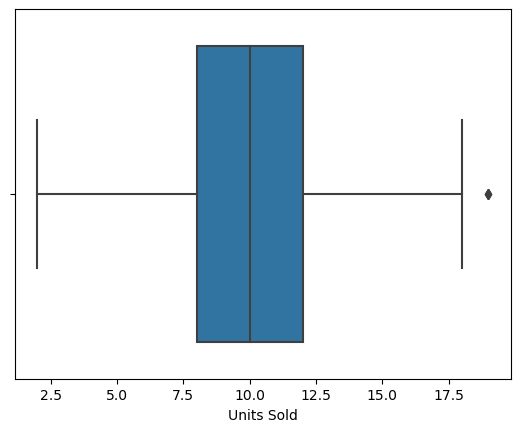

In [40]:
sns.boxplot(x='Units Sold', data=df_noout)

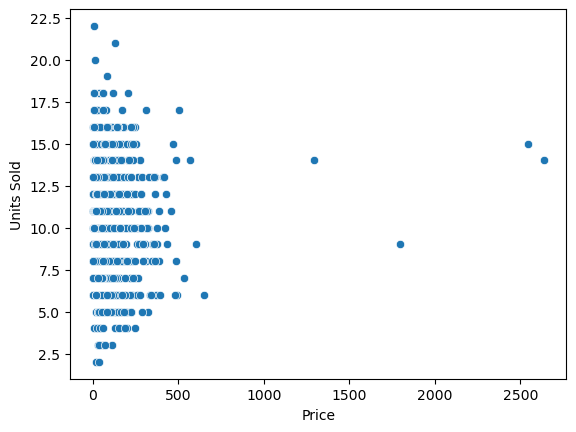

In [31]:
# Scatter plot of 'Price' vs. 'Units Sold'
sns.scatterplot(x='Price', y='Units Sold', data=df)
plt.show()

C:\Users\FinderHu\AppData\Local\Temp\ipykernel_10620\3838943030.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df.corr()


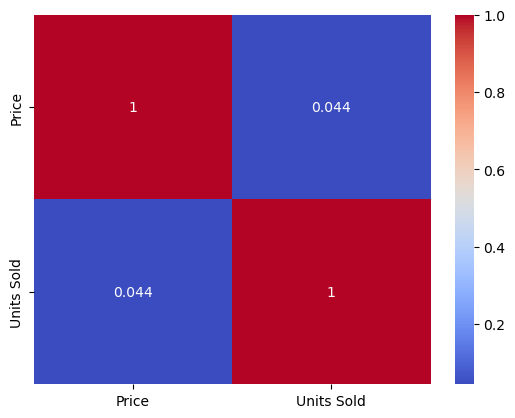

In [32]:
# Correlation matrix heatmap
corr_matrix = df.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.show()